In [3]:
import pandas as pd
import numpy as np
import datetime
import time
import requests
from bs4 import BeautifulSoup
import os
from selenium.webdriver.common.keys import Keys 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pyperclip

from ibd import df_ibd
from scraping import df_tt

IBD_Excel/20210215_IBD.xlsx


In [6]:
df_rs = df_ibd[df_ibd['RS Rating'] > 70]
df_rs

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,...,# of Funds - last reported qrtr,Pretax Margin,Curr Yr EPS Est. % Chg.,Curr Qtr EPS Est. % Chg.,Last Qtr EPS % Chg.,Last Qtr Sales % Chg.,Div Yield,PE Ratio,IPO Date,Vol- 50 Day Avg. (1000s)
ACIA,114.86,-0.06,-0.05,99.0,77.0,82.0,9.0,5.0,13.0,3.0,...,300.0,17.4,56.0,92.0,30.0,33.0,0.0,47.0,2016-05-13,1632.0
ACMR,135.23,15.80,13.20,99.0,81.0,89.0,12.0,4.0,13.0,5.0,...,146.0,20.9,-17.0,17.0,-21.0,43.0,0.0,114.0,2017-11-03,303.0
ACST,1.03,-0.08,-7.21,90.0,58.0,95.0,12.0,1.0,13.0,NaN,...,3.0,NaN,NaN,-112.0,83.0,NaN,0.0,6.0,NaT,57989.0
ACTG,8.00,0.14,1.78,96.0,70.0,94.0,10.0,3.0,13.0,2.0,...,125.0,-69.7,NaN,80.0,346.0,1039.0,0.0,66.0,NaT,1003.0
ADMP,1.55,-0.02,-1.27,65.0,37.0,92.0,12.0,1.0,13.0,4.0,...,15.0,-131.1,NaN,33.0,17.0,-27.0,0.0,NaN,NaT,21925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSIA,15.97,-0.07,-0.44,27.0,5.0,87.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,1616.0
UPST,102.18,7.05,7.41,76.0,30.0,98.0,11.0,3.0,NaN,4.0,...,25.0,-3.0,NaN,-113.0,1400.0,32.0,0.0,679.0,2020-12-16,2082.0
WISH,27.45,-0.63,-2.24,42.0,19.0,77.0,10.0,2.0,NaN,5.0,...,55.0,-6.7,NaN,-1071.0,26.0,33.0,0.0,NaN,2020-12-16,7760.0
WNW,32.19,16.30,102.00,20.0,1.0,97.0,10.0,NaN,NaN,NaN,...,1.0,-22.8,NaN,NaN,-200.0,22.0,0.0,NaN,2020-12-15,610.0


In [7]:
trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
len(trend_template_list)

441

In [2]:
from scraping import df_tt

df_tt

,Beta,ATR,SMA20,SMA50,SMA200,52W High,52W Low,RSI,Price,from Open,Gap
Ticker,,,,,,,,,,,
A,1.01,3.00,0.0194,0.0384,0.2269,-0.0738,1.0754,56.65,126.87,-0.0120,0.0057
AAON,0.65,2.28,0.0110,0.0959,0.2638,-0.0523,0.9021,58.32,77.00,0.0174,0.0025
AB,1.46,1.16,-0.0087,0.0520,0.2403,-0.0656,1.7983,50.73,37.05,-0.0191,-0.0032
ABC,0.48,2.76,-0.0068,0.0260,0.0615,-0.0621,0.4692,50.90,105.87,0.0025,0.0033
ABR,1.85,0.44,0.0820,0.1155,0.3973,0.0151,3.5678,67.74,16.17,0.0466,0.0052
...,...,...,...,...,...,...,...,...,...,...,...
ZIXI,1.17,0.45,0.1066,0.1767,0.4459,-0.0141,2.5651,68.70,10.13,0.0025,0.0151
ZLAB,1.17,8.10,0.0028,0.1645,0.7639,-0.0939,3.0725,56.09,175.36,0.0118,0.0108
ZNGA,0.19,0.48,0.1313,0.2126,0.3139,-0.0098,1.1558,71.89,12.18,-0.0041,0.0107


In [19]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

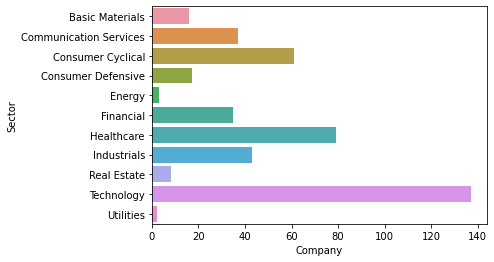

In [23]:
from overview_trial import df_overview

filtered = df_overview[df_overview.index.isin(trend_template_list)]
plotting = pd.DataFrame(filtered.groupby('Sector').count()['Company'])
sns.barplot(y=plotting.index, x=plotting['Company'])


In [5]:
finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='

In [29]:
trend_template_str = ','.join(trend_template_list)

In [30]:
trend_template_str = 'A,AAPL,AA'

In [6]:

def finviz_link_charts():
    
    finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='
    trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
    
    trend_template_str = ','.join(trend_template_list)
    
    result = finviz_chart_url + trend_template_str
    
    return result
finviz_link_charts()

'https://finviz.com/screener.ashx?v=211&t=ACIA,ACMR,ACTG,AMAT,AOUT,ARGX,ATEC,AXON,BG,BILI,BOMN,CGNX,DAVA,DMTK,EGOV,EVGN,FINV,FLNT,FTHM,FUTU,GTYH,HIMX,ICLK,JEF,JYNT,KLIC,KLR,KOPN,LUNA,MGPI,MWK,NESR,NIO,ONTO,OPRX,OPY,ORGO,PAR,PERI,PROF,QFIN,RBBN,RIOT,RMNI,ROKU,SIMO,SKLZ,SKY,SNBR,SONO,SSP,STKL,STXS,SWAV,TPB,UPWK,UUUU,VERI,VHC,VIPS,VUZI,WATT,WK,WKHS,YY,ACLS,ACRS,AEYE,AKTS,AOSL,API,AVNW,BXC,CLDR,CMBM,CRL,CRON,CTRN,CVLT,DAC,DQ,ECOM,EOLS,EXPI,FPI,FRG,GCI,GH,GNMK,IAC,IIIN,IMGN,INSG,MGNI,MNKD,MXL,NPTN,NVAX,NVEE,ONCT,PACK,PACW,QNST,RCII,RESN,RLGT,RVP,SNAP,STAA,STTK,TTGT,UCTT,VSTO,ZIXI,ZUO,AGRO,ALTM,AMKR,AMRC,APPS,AXTI,BCRX,BGFV,BILL,CASA,CCS,CEVA,CHWY,CLSK,CLXT,CSV,CTSO,CUBI,DGII,DKNG,DOYU,DVAX,DZSI,ERII,ETSY,FFIV,FORM,GWPH,ICHR,INFU,INMD,JOE,JOUT,KC,KLAC,LASR,LOGI,LPRO,MBIN,MDC,MDLA,MEDP,NATR,NIU,NVMI,OSTK,PD,PDD,PHR,PLT,PRTS,QRTEA,QTRX,RADA,REZI,SBGI,SCHN,SGRY,SHOP,SMAR,SMG,SPB,SSTK,TBBK,TCS,TDOC,TSM,TWTR,UCBI,VALE,VCEL,VFF,VIVO,VMI,WSC,ZBRA,ZI,ZLAB,ZNGA,ACA,ALGN,AMSC,ASML,ASO,ATHM,ATLC,AVLR,B

In [1]:
from overview_trial import df_overview
df_overview
#del df_overview['Price']
df_overview

Finviz/20210221_total.csv


,Company,Sector,Industry,Country
Ticker,,,,
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA
AA,Alcoa Corporation,Basic Materials,Aluminum,USA
AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China
AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA
AAIC,Arlington Asset Investment Corp.,Real Estate,REIT - Mortgage,USA
...,...,...,...,...
ZI,ZoomInfo Technologies Inc.,Technology,Software - Application,USA
ZIM,ZIM Integrated Shipping Services Ltd.,Industrials,Marine Shipping,Israel
ZION,"Zions Bancorporation, National Association",Financial,Banks - Regional,USA


In [13]:
pd.read_csv('./Finviz/20210221_total.csv', index_col = 0)

,0,1,2,3,4,5,6,7,8,9,10
0,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
1,1,A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA,38.44B,55.11,126.87,-0.63%,1256386
2,2,AA,Alcoa Corporation,Basic Materials,Aluminum,USA,4.25B,-,23.13,9.52%,7212741
3,3,AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China,176.54M,-,5.66,-1.57%,495842
4,4,AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA,956.34M,-,13.20,3.29%,5624494
...,...,...,...,...,...,...,...,...,...,...,...
16,56,ACIC,Atlas Crest Investment Corp.,Financial,Shell Companies,USA,814.00M,-,16.28,-5.02%,9027825
17,57,ACIU,AC Immune SA,Healthcare,Biotechnology,Switzerland,591.54M,-,8.01,1.26%,1099296
18,58,ACIW,"ACI Worldwide, Inc.",Technology,Software - Infrastructure,USA,4.94B,83.03,42.43,-0.52%,474609
19,59,ACKIT,Ackrell SPAC Partners I Co.,Financial,Shell Companies,USA,-,-,10.20,0.29%,70429


In [9]:
url = 'https://finviz.com/screener.ashx'
driver = webdriver.Chrome('./chromedriver')
ticker_input_x = '//*[@id="tickersInput"]'
enter_button_x = '/html/body/table[3]/tbody/tr[1]/td/table/tbody/tr[2]/td[10]/input'
charts_button_x = '//*[@id="screener-content"]/table/tbody/tr[1]/td/table/tbody/tr/td[8]/a'
driver.get(url)